<a href="https://colab.research.google.com/github/koalalovepabro/Stock-Portfolio-Optimization/blob/main/Test/Stock_Portfolio(%EA%B8%89%EB%93%B1%EC%A3%BC)_ver2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📈 종목선택 방법**
- 급등주 포착: 특정 거래일의 거래량이 이전 시점의 평균 거래량보다 1,000% 이상 급증하는 종목을 선택  
- ‘이전 시점의 평균 거래량’을 특정 거래일 이전의 20일(거래일 기준) 동안의 평균 거래량으로 정의



# **📊 포트폴리오 최적화 방법**  
1. **Max Sharpe Ratio** : 샤프비율이 최대가 되도록 포트폴리오 최적화  
    => 수익률과 변동성을 모두 고려
2. **✔ Efficient Risk**   : 주어진 변동성 ( target_volatility ) 보다 낮은 범위 내에서 수익률 (Return)이 최대가 되도록 포트폴리오 최적화  
    => 높은 이익을 추구하기 보다는, 비교적 위험이 낮은 투자를 원하는 투자자에게 추천
3. **Efficient Return** : 주어진 리스크 ( target_return )을 만족시키는 선에서 변동성(volatility)를 최소가 되도록 포트폴리오 최적화  
    => 높은 위험을 감수하더라도, 높은 이익을 추구하는 투자 성향을 가진 투자자에게 추천

In [1]:
!pip install -q install finance-datareader

In [2]:
!pip install pykrx

In [3]:
!pip install matplotlib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from pykrx import stock
import datetime

In [5]:
def check_speedy_rising_volume_yesterday(code): # 어제를 기준으로 
    today = datetime.datetime.today().strftime("%Y%m%d")
    df = fdr.DataReader(code, '2020-01-01')
    volumes = df['Volume'].iloc[::-1]

    if len(volumes) < 22: # 총 22일 치의 데이터가 없을 경우 제외(최근 상장 종목)
        return False

    sum_vol20 = 0
    today_vol = 0

    for i, vol in enumerate(volumes):
        if i == 0: # 오늘 날짜
            continue
        elif i == 1: # 어제 날짜
            today_vol = vol
        elif 2 <= i <= 21: 
            sum_vol20 += vol
        else:
            break

    avg_vol20 = sum_vol20 / 20 # 최근 20일간 평균 거래량 구하기
    if today_vol > avg_vol20 * 10: # 조회 시작일의 거래량이 평균 거래량을 1000% 초과한다면 True
        return True

# 전체 종목 가져오기

In [ ]:
# 오늘 KOSPI&KOSDAQ 종목 전체 불러오기
today = datetime.datetime.today().strftime("%Y%m%d")
kospi = stock.get_market_fundamental_by_ticker(today, market='KOSPI').index
kosdaq = stock.get_market_fundamental_by_ticker(today, market='KOSDAQ').index

# konex = stock.get_market_fundamental_by_ticker(today, market='KONEX').index

stocks = kospi.append(kosdaq)
# stocks = stocks.append(konex)
stocks

Index(['095570', '006840', '027410', '282330', '138930', '001460', '001465',
       '001040', '079160', '00104K',
       ...
       '065510', '243070', '084110', '263920', '145020', '024060', '010240',
       '189980', '037440', '238490'],
      dtype='object', name='티커', length=2391)

In [ ]:
def run(): # 어제 거래량이 1000% 오늘 종목 찾기
    speedy_rising_volume_list = []
    num = len(stocks)

    for i, code in enumerate(stocks):
#         print(i, '/', num)
        if check_speedy_rising_volume_yesterday(code):
            print("급등주: ", code)
            speedy_rising_volume_list.append(code)
    return speedy_rising_volume_list

In [ ]:
speedy_rising_volume_list = run()

급등주:  011420
급등주:  003475
급등주:  063440
급등주:  348030
급등주:  006920
급등주:  122350
급등주:  357550
급등주:  043260
급등주:  347000
급등주:  356890
급등주:  225330
급등주:  032080
급등주:  048830
급등주:  153710
급등주:  313760
급등주:  303530
급등주:  064290
급등주:  049630
급등주:  047820
급등주:  163730


In [ ]:
speedy_rising_volume_list

['011420',
 '003475',
 '063440',
 '348030',
 '006920',
 '122350',
 '357550',
 '043260',
 '347000',
 '356890',
 '225330',
 '032080',
 '048830',
 '153710',
 '313760',
 '303530',
 '064290',
 '049630',
 '047820',
 '163730']

In [ ]:
speedy_rising_volume_list_df = pd.DataFrame({'speedy_rising_volume_list':speedy_rising_volume_list})

In [ ]:
speedy_rising_volume_list_df.to_csv("speedy_rising_volume_list_df.csv")

In [86]:
import requests

## 미리 csv 파일로 저장해 둔 급등주 결과 불러오기

In [5]:
speedy_rising_volume_list_df = pd.read_csv('speedy_rising_volume_list_df.csv')
speedy_rising_volume_list_df

,Unnamed: 0,speedy_rising_volume_list
0,0,11420
1,1,3475
2,2,63440
3,3,348030
4,4,6920
5,5,122350
6,6,357550
7,7,43260
8,8,347000
9,9,356890


In [6]:
# 종목코드 6자리로 맞춰주기
speedy_rising_volume_list_df['speedy_rising_volume_list'] = speedy_rising_volume_list_df['speedy_rising_volume_list'].apply(lambda x: '{0:0>6}'.format(x))
speedy_rising_volume_list_df

,Unnamed: 0,speedy_rising_volume_list
0,0,011420
1,1,003475
2,2,063440
3,3,348030
4,4,006920
5,5,122350
6,6,357550
7,7,043260
8,8,347000
9,9,356890


# 종목이름과 종목 코드

In [7]:
###########추가#############
kospi_temp = fdr.StockListing('KOSPI')[['Symbol', 'Name']]
kosdaq_temp = fdr.StockListing('KOSDAQ')[['Symbol', 'Name']]
code_name_dict = pd.concat([kospi_temp,kosdaq_temp])
code_name_dict = code_name_dict.set_index('Symbol').to_dict().get('Name')
code_name_dict

{'095570': 'AJ네트웍스',
 '006840': 'AK홀딩스',
 '152100': 'ARIRANG 200',
 '295820': 'ARIRANG 200동일가중',
 '253150': 'ARIRANG 200선물레버리지',
 '253160': 'ARIRANG 200선물인버스2X',
 '395750': 'ARIRANG ESG가치주액티브',
 '395760': 'ARIRANG ESG성장주액티브',
 '278420': 'ARIRANG ESG우수기업',
 '292750': 'ARIRANG KRX300',
 '309210': 'ARIRANG KRX300헬스케어',
 '333940': 'ARIRANG KS로우볼가중TR',
 '333950': 'ARIRANG KS로우사이즈가중TR',
 '333960': 'ARIRANG KS모멘텀가중TR',
 '333970': 'ARIRANG KS밸류가중TR',
 '333980': 'ARIRANG KS퀄리티가중TR',
 '269530': 'ARIRANG S&P글로벌인프라',
 '251590': 'ARIRANG 고배당저변동50',
 '161510': 'ARIRANG 고배당주',
 '251600': 'ARIRANG 고배당주채권혼합',
 '289670': 'ARIRANG 국채선물10년',
 '298340': 'ARIRANG 국채선물3년',
 '189400': 'ARIRANG 글로벌MSCI(합성 H)',
 '278620': 'ARIRANG 단기채권액티브',
 '269540': 'ARIRANG 미국S&P500(H)',
 '287180': 'ARIRANG 미국나스닥기술주',
 '213630': 'ARIRANG 미국다우존스고배당주(합성 H)',
 '332610': 'ARIRANG 미국단기우량회사채',
 '332620': 'ARIRANG 미국장기우량회사채',
 '195970': 'ARIRANG 선진국MSCI(합성 H)',
 '238670': 'ARIRANG 스마트베타Quality채권혼합',
 '195980': 'ARIRANG 신흥국MSCI(합성 H

In [8]:
import warnings
warnings.filterwarnings(action='ignore')

### 급등주 종목 저장

In [9]:
import requests

In [10]:
assets= np.array(speedy_rising_volume_list_df['speedy_rising_volume_list'].values)
assets

array(['011420', '003475', '063440', '348030', '006920', '122350',
       '357550', '043260', '347000', '356890', '225330', '032080',
       '048830', '153710', '313760', '303530', '064290', '049630',
       '047820', '163730'], dtype=object)

In [11]:
len(assets)

20

### 3년치 주가 데이터 가져오기

In [12]:
# 종목별 종가 가져오기
from datetime import datetime

#시작일
start_date = '2018-07-19'

# today = datetime.today().strftime('%Y-%m-%d')
end_date = '2021-07-19'

# 각 주식의 일별 종가 데이터를 저장할 데이터 프레임을 생성
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# FinanceDataReader로 각 종목의 종가데이터 불러오기
for stock in assets:
  df[stock] = fdr.DataReader(stock, start_date, end_date)['Close']
df

,011420,003475,063440,348030,006920,122350,357550,043260,347000,356890,225330,032080,048830,153710,313760,303530,064290,049630,047820,163730
Date,,,,,,,,,,,,,,,,,,,,
2018-07-19,1885,2305,2110,NaN,5530,3075,NaN,1140,NaN,NaN,7970,1970,2060,NaN,NaN,NaN,3570,1472,1393,NaN
2018-07-20,1880,2285,2000,NaN,5540,3060,NaN,1085,NaN,NaN,7960,1900,2050,NaN,NaN,NaN,3540,1434,1398,NaN
2018-07-23,1855,2305,1900,NaN,5180,3005,NaN,1040,NaN,NaN,7800,1840,1960,NaN,NaN,NaN,3335,1351,1302,NaN
2018-07-24,1850,2325,1960,NaN,5450,2985,NaN,1085,NaN,NaN,7940,1865,2015,NaN,NaN,NaN,3435,1458,1316,NaN
2018-07-25,1820,2320,1925,NaN,5530,3050,NaN,1070,NaN,NaN,7920,1830,1980,NaN,NaN,NaN,3425,1393,1288,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,1950,4650,2775,20900.0,6000,4175,20550.0,1675,19450.0,14750.0,7450,3025,2340,15000.0,13650.0,15500.0,22200,1030,2460,19900.0
2021-07-14,1900,4580,2775,20600.0,5970,4220,21550.0,1720,19300.0,14600.0,7490,3025,2375,14850.0,13500.0,15950.0,21900,1050,2500,19800.0
2021-07-15,1895,4580,2765,20750.0,5970,4205,21450.0,1720,19650.0,14800.0,7790,3000,3085,14800.0,13500.0,15750.0,22600,1100,2470,19750.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2018-07-19 to 2021-07-19
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   011420  740 non-null    int64  
 1   003475  740 non-null    int64  
 2   063440  740 non-null    int64  
 3   348030  118 non-null    float64
 4   006920  740 non-null    int64  
 5   122350  740 non-null    int64  
 6   357550  141 non-null    float64
 7   043260  740 non-null    int64  
 8   347000  180 non-null    float64
 9   356890  91 non-null     float64
 10  225330  740 non-null    int64  
 11  032080  740 non-null    int64  
 12  048830  740 non-null    int64  
 13  153710  675 non-null    float64
 14  313760  491 non-null    float64
 15  303530  22 non-null     float64
 16  064290  740 non-null    int64  
 17  049630  740 non-null    int64  
 18  047820  740 non-null    int64  
 19  163730  117 non-null    float64
dtypes: float64(8), int64(12)
memory usage: 121.4 KB


In [14]:
df.isnull().sum()

011420      0
003475      0
063440      0
348030    622
006920      0
122350      0
357550    599
043260      0
347000    560
356890    649
225330      0
032080      0
048830      0
153710     65
313760    249
303530    718
064290      0
049630      0
047820      0
163730    623
dtype: int64

In [15]:
# 결측값 있는 열 삭제 
df2 = df.dropna(axis = 1)
df2

,011420,003475,063440,006920,122350,043260,225330,032080,048830,064290,049630,047820
Date,,,,,,,,,,,,
2018-07-19,1885,2305,2110,5530,3075,1140,7970,1970,2060,3570,1472,1393
2018-07-20,1880,2285,2000,5540,3060,1085,7960,1900,2050,3540,1434,1398
2018-07-23,1855,2305,1900,5180,3005,1040,7800,1840,1960,3335,1351,1302
2018-07-24,1850,2325,1960,5450,2985,1085,7940,1865,2015,3435,1458,1316
2018-07-25,1820,2320,1925,5530,3050,1070,7920,1830,1980,3425,1393,1288
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,1950,4650,2775,6000,4175,1675,7450,3025,2340,22200,1030,2460
2021-07-14,1900,4580,2775,5970,4220,1720,7490,3025,2375,21900,1050,2500
2021-07-15,1895,4580,2765,5970,4205,1720,7790,3000,3085,22600,1100,2470


### 종목별 연평균 기대수익률 & 일간수익률의 공분산

In [16]:
!pip install PyPortfolioOpt

In [17]:
# Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

#### ver01> 종가에 결측값이 있는 종목을 삭제하지 않은 df로 포트폴리오 구성 ( 20개 종목 )

In [18]:
# Calculate the expected annualized returns
# 복리 연평균 수익률
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu = expected_returns.mean_historical_return(df)

# Calculate the annualized sample covariance matrix of the daily asset returns
S = risk_models.sample_cov(df)

In [19]:
mu

011420   -1.110223e-16
003475    2.500297e-01
063440    9.589725e-02
348030   -7.019548e-01
006920    1.579050e-02
122350    1.135276e-01
357550   -2.837499e-01
043260    1.436814e-01
347000    4.288639e-01
356890   -6.412862e-01
225330   -1.696296e-02
032080    1.449568e-01
048830    1.380535e-01
153710    5.787577e-02
313760   -3.373007e-01
303530   -7.976242e-01
064290    8.489805e-01
049630   -1.073683e-01
047820    2.411839e-01
163730   -5.762267e-01
dtype: float64

In [20]:
len(mu)

20

In [21]:
S

,011420,003475,063440,348030,006920,122350,357550,043260,347000,356890,225330,032080,048830,153710,313760,303530,064290,049630,047820,163730
011420,0.389199,0.067839,0.100413,-0.020704,0.104577,0.080621,0.014923,0.082580,0.021100,-0.049709,0.046022,0.079280,0.090973,0.063291,0.123765,-0.029680,0.089077,0.078694,0.084398,-0.015073
003475,0.067839,0.232666,0.072384,0.063561,0.068134,0.059841,0.021312,0.080279,0.057748,-0.004430,0.023621,0.045714,0.057180,0.084420,0.118984,0.034942,0.064630,0.053303,0.047889,-0.002345
063440,0.100413,0.072384,0.498424,0.041916,0.106014,0.095137,0.091880,0.086739,0.036322,0.027014,0.038365,0.081410,0.090404,0.096307,0.147278,0.009990,0.108397,0.082985,0.130910,0.085888
348030,-0.020704,0.063561,0.041916,0.317485,0.043186,0.016560,0.084729,0.055427,0.032672,0.024948,0.077400,0.032534,0.031964,0.061765,0.019712,0.000135,0.047663,0.019536,0.049194,0.066343
006920,0.104577,0.068134,0.106014,0.043186,0.269989,0.092627,0.070312,0.075538,0.045417,-0.007788,0.047362,0.079623,0.100377,0.084082,0.145958,0.024855,0.096346,0.130116,0.077987,0.024622
122350,0.080621,0.059841,0.095137,0.016560,0.092627,0.270189,0.123576,0.088794,0.039753,0.027350,0.024247,0.061569,0.080379,0.107659,0.142161,0.000890,0.095158,0.074315,0.072146,-0.002271
357550,0.014923,0.021312,0.091880,0.084729,0.070312,0.123576,0.453268,0.051695,0.111414,0.026779,0.037829,0.062907,0.044755,0.091705,0.056821,0.038590,0.037765,0.075156,0.064378,0.055096
043260,0.082580,0.080279,0.086739,0.055427,0.075538,0.088794,0.051695,0.287681,0.302518,-0.007216,0.033369,0.067558,0.076795,0.060203,0.146225,0.015663,0.097435,0.077421,0.065090,-0.021653
347000,0.021100,0.057748,0.036322,0.032672,0.045417,0.039753,0.111414,0.302518,0.571921,-0.021605,0.021915,0.023243,0.045954,0.049236,0.069722,0.007707,0.056071,0.017908,0.024044,0.009360
356890,-0.049709,-0.004430,0.027014,0.024948,-0.007788,0.027350,0.026779,-0.007216,-0.021605,0.246076,-0.017104,0.004037,0.004621,0.012704,0.024602,-0.011001,0.013926,0.007044,0.008152,-0.006757


In [22]:
len(S)

20

In [23]:
S.shape

(20, 20)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


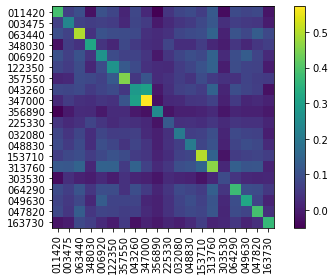

In [24]:
# 수익률의 공분산
from pypfopt import plotting

plotting.plot_covariance(S)

#### ver02> 종가에 결측값이 있는 종목을 삭제한 df2로 포트폴리오 구성 ( 12개 종목 )

In [25]:
# Calculate the expected annualized returns
# 복리 연평균 수익률
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu2 = expected_returns.mean_historical_return(df2) 

# Calculate the annualized sample covariance matrix of the daily asset returns
S2 = risk_models.sample_cov(df2)

In [26]:
mu2

011420   -1.110223e-16
003475    2.500297e-01
063440    9.589725e-02
006920    1.579050e-02
122350    1.135276e-01
043260    1.436814e-01
225330   -1.696296e-02
032080    1.449568e-01
048830    1.380535e-01
064290    8.489805e-01
049630   -1.073683e-01
047820    2.411839e-01
dtype: float64

In [27]:
len(mu2)

12

In [28]:
S2.shape

(12, 12)

In [29]:
len(S2)

12

In [30]:
S2

,011420,003475,063440,006920,122350,043260,225330,032080,048830,064290,049630,047820
011420,0.389199,0.067839,0.100413,0.104577,0.080621,0.082580,0.046022,0.079280,0.090973,0.089077,0.078694,0.084398
003475,0.067839,0.232666,0.072384,0.068134,0.059841,0.080279,0.023621,0.045714,0.057180,0.064630,0.053303,0.047889
063440,0.100413,0.072384,0.498424,0.106014,0.095137,0.086739,0.038365,0.081410,0.090404,0.108397,0.082985,0.130910
006920,0.104577,0.068134,0.106014,0.269989,0.092627,0.075538,0.047362,0.079623,0.100377,0.096346,0.130116,0.077987
122350,0.080621,0.059841,0.095137,0.092627,0.270189,0.088794,0.024247,0.061569,0.080379,0.095158,0.074315,0.072146
043260,0.082580,0.080279,0.086739,0.075538,0.088794,0.287681,0.033369,0.067558,0.076795,0.097435,0.077421,0.065090
225330,0.046022,0.023621,0.038365,0.047362,0.024247,0.033369,0.123789,0.037371,0.038752,0.046308,0.038371,0.039466
032080,0.079280,0.045714,0.081410,0.079623,0.061569,0.067558,0.037371,0.204309,0.066183,0.088066,0.074493,0.071570
048830,0.090973,0.057180,0.090404,0.100377,0.080379,0.076795,0.038752,0.066183,0.209711,0.077839,0.096963,0.085453
064290,0.089077,0.064630,0.108397,0.096346,0.095158,0.097435,0.046308,0.088066,0.077839,0.375969,0.096379,0.091970


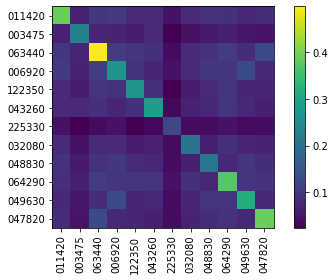

In [31]:
# 수익률의 공분산
from pypfopt import plotting

plotting.plot_covariance(S2)

# 포트폴리오 최적화 ( Efficient Risk )

#### ver01> 결측값 삭제하지 않음 / df / mu, S / ef, cleaned_weights ( 20개 종목 )

In [32]:
!pip install PyPortfolioOpt

In [33]:
import pypfopt
pypfopt.__version__

'1.4.2'

In [34]:
# Efficient_risk로 최적화 했을때의 결과 확인
vol_limit = 0.3
ef = EfficientFrontier(mu, S)
ef.efficient_risk(vol_limit)
ef.portfolio_performance(verbose=True)

Expected annual return: 33.7%
Annual volatility: 30.0%
Sharpe Ratio: 1.06


(0.3370441320257059, 0.2999999999977399, 1.0568137734269811)

In [35]:
# max_sharpe로 최적화 했을때의 결과 확인
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
ef.portfolio_performance(verbose=True)

Expected annual return: 71.5%
Annual volatility: 49.3%
Sharpe Ratio: 1.41


(0.7154780588529528, 0.4929372058638349, 1.4108857083209625)

In [36]:
from pypfopt import risk_models, expected_returns
from pypfopt import EfficientFrontier, objective_functions
import cvxpy as cp

# Risk 범위 내에서 Return을 최대로 !
# 감당 가능한 최대 리스크를 0.11 (11 %)로 설정
vol_limit = 0.3

ef = EfficientFrontier(mu, S)  # Create the Efficient Frontier Object

weights = ef.efficient_risk(vol_limit)

cleaned_weights = ef.clean_weights()
print(cleaned_weights)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef.portfolio_performance(verbose=True)

OrderedDict([('011420', 0.0), ('003475', 0.17651), ('063440', 0.0), ('348030', 0.0), ('006920', 0.0), ('122350', 0.03108), ('357550', 0.0), ('043260', 0.0), ('347000', 0.10977), ('356890', 0.0), ('225330', 0.21758), ('032080', 0.09659), ('048830', 0.06213), ('153710', 0.0), ('313760', 0.0), ('303530', 0.0), ('064290', 0.24603), ('049630', 0.0), ('047820', 0.0603), ('163730', 0.0)])
Expected annual return: 33.7%
Annual volatility: 30.0%
Sharpe Ratio: 1.06


(0.3370441320257059, 0.2999999999977399, 1.0568137734269811)

In [37]:
weights

OrderedDict([('011420', 9.48788e-11),
             ('003475', 0.1765138839605029),
             ('063440', 1.013204e-10),
             ('348030', 1.60439e-11),
             ('006920', 7.11639e-11),
             ('122350', 0.0310815328195173),
             ('357550', 4.66046e-11),
             ('043260', 4.13501e-11),
             ('347000', 0.1097728306550564),
             ('356890', 1.34896e-10),
             ('225330', 0.2175790365694954),
             ('032080', 0.0965930095426039),
             ('048830', 0.0621342296629936),
             ('153710', 1.4805024e-09),
             ('313760', 1.36329e-11),
             ('303530', 2.07839e-11),
             ('064290', 0.2460272860296662),
             ('049630', 5.73486e-11),
             ('047820', 0.0602981886352778),
             ('163730', 4.63702e-11)])

In [38]:
len(weights)

20

In [39]:
cleaned_weights

OrderedDict([('011420', 0.0),
             ('003475', 0.17651),
             ('063440', 0.0),
             ('348030', 0.0),
             ('006920', 0.0),
             ('122350', 0.03108),
             ('357550', 0.0),
             ('043260', 0.0),
             ('347000', 0.10977),
             ('356890', 0.0),
             ('225330', 0.21758),
             ('032080', 0.09659),
             ('048830', 0.06213),
             ('153710', 0.0),
             ('313760', 0.0),
             ('303530', 0.0),
             ('064290', 0.24603),
             ('049630', 0.0),
             ('047820', 0.0603),
             ('163730', 0.0)])

In [40]:
len(cleaned_weights)

20

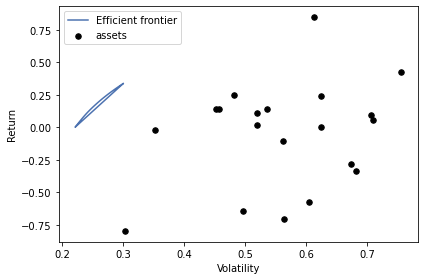

In [41]:
# 효율적 투자선와 각 종목의 수익률 & 변동성
import matplotlib.pyplot as plt

# ef = EfficientFrontier(mu, S, solver='SCS')

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.legend(loc='best')
plt.show()

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


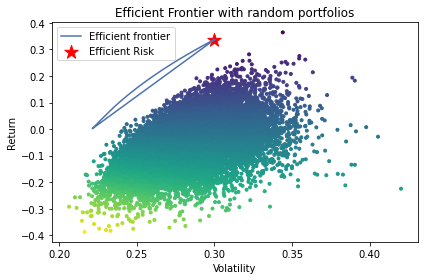

In [42]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
vol_limit = 0.3
ef.efficient_risk(vol_limit)
ret_tangent, std_tangent, _ = ef.portfolio_performance()  # 기대수익률 , Risk(변동성)
ax.scatter(std_tangent, ret_tangent, marker="*", s=200, c="r", label="Efficient Risk")

# Generate random portfolios
n_samples = 20000
w = np.random.dirichlet(np.ones(len(mu)), n_samples) # 난수로 20000세트의 투자비중 만들기
rets = w.dot(mu)                                     # 기대수익률
stds = np.sqrt(np.diag(w @ S @ w.T))                 # Risk(변동성)
sharpes = rets / stds                                # 샤프비율

ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend(loc='best')
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [43]:
# Max.Sharpe Ratio로 최적화한 포트폴리오의 수익률과 변동성, 샤프비율
ef.portfolio_performance(verbose=True)

Expected annual return: 33.7%
Annual volatility: 30.0%
Sharpe Ratio: 1.06


(0.33704413024599633, 0.29999999993250587, 1.0568137677244167)

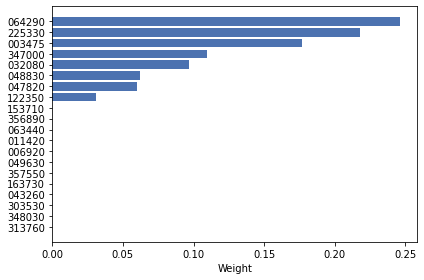

In [44]:
# 종목별 투자비중
plotting.plot_weights(weights, ax=None)

#### ver02> 결측값 삭제 / df2 / mu2, S2 / ef2, cleaned_weights2 ( 12개 종목 )

In [45]:
# Efficient_risk로 최적화 했을때의 결과 확인
vol_limit2 = 0.3
ef2 = EfficientFrontier(mu2, S2)
ef2.efficient_risk(vol_limit2)
ef2.portfolio_performance(verbose=True)

Expected annual return: 30.4%
Annual volatility: 30.0%
Sharpe Ratio: 0.95


(0.3035474651412203, 0.30000000005047844, 0.9451582169783671)

In [46]:
# max_sharpe로 최적화 했을때의 결과 확인
ef2 = EfficientFrontier(mu2, S2)
ef2.max_sharpe()
ef2.portfolio_performance(verbose=True)

Expected annual return: 75.3%
Annual volatility: 53.7%
Sharpe Ratio: 1.36


(0.7526643158706008, 0.5368547687322833, 1.3647346704225012)

In [47]:
# Risk 범위 내에서 Return을 최대로 !
# 감당 가능한 최대 리스크를 0.151 (15.1 %)로 설정
vol_limit2 = 0.3
ef2 = EfficientFrontier(mu2, S2)  # Create the Efficient Frontier Object

weights2 = ef2.efficient_risk(vol_limit2)

# clean_weights()-> rounds the weights and clips near-zeros.
# weights < 0.0001 => clean_weights = 0
# cleaned_weights => 소숫점 5자리까지 표시
cleaned_weights2 = ef2.clean_weights()
print(cleaned_weights2)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef2.portfolio_performance(verbose=True)

OrderedDict([('011420', 0.0), ('003475', 0.20148), ('063440', 0.0), ('006920', 0.0), ('122350', 0.04063), ('043260', 0.01746), ('225330', 0.25259), ('032080', 0.10092), ('048830', 0.07924), ('064290', 0.24771), ('049630', 0.0), ('047820', 0.05997)])
Expected annual return: 30.4%
Annual volatility: 30.0%
Sharpe Ratio: 0.95


(0.3035474651412203, 0.30000000005047844, 0.9451582169783671)

In [48]:
weights2

OrderedDict([('011420', 6.28535e-11),
             ('003475', 0.2014785167145681),
             ('063440', 7.46532e-11),
             ('006920', 5.91502e-11),
             ('122350', 0.040631616653312),
             ('043260', 0.017456535768528),
             ('225330', 0.2525881578478024),
             ('032080', 0.1009240476894064),
             ('048830', 0.0792410872663569),
             ('064290', 0.247712624760137),
             ('049630', 4.16891e-11),
             ('047820', 0.0599674130615386)])

In [49]:
len(weights2)

12

In [50]:
cleaned_weights2

OrderedDict([('011420', 0.0),
             ('003475', 0.20148),
             ('063440', 0.0),
             ('006920', 0.0),
             ('122350', 0.04063),
             ('043260', 0.01746),
             ('225330', 0.25259),
             ('032080', 0.10092),
             ('048830', 0.07924),
             ('064290', 0.24771),
             ('049630', 0.0),
             ('047820', 0.05997)])

In [51]:
len(cleaned_weights2)

12

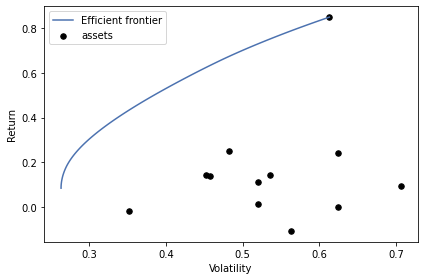

In [52]:
# 효율적 투자선와 각 종목의 수익률 & 변동성
import matplotlib.pyplot as plt

ef2 = EfficientFrontier(mu2, S2, solver='SCS')

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=True)
plt.legend(loc='best')
plt.show()

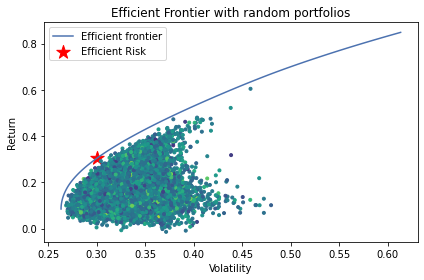

In [53]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=False)

# Find the tangency portfolio
vol_limit2 = 0.3
ef2.efficient_risk(vol_limit2)
ret_tangent2, std_tangent2, _ = ef2.portfolio_performance()  # 기대수익률 , Risk(변동성)
ax.scatter(std_tangent2, ret_tangent2, marker="*", s=200, c="r", label="Efficient Risk")

# Generate random portfolios
n_samples = 20000
w2 = np.random.dirichlet(np.ones(len(mu2)), n_samples) # 난수로 20000세트의 투자비중 만들기
rets2 = w2.dot(mu2)                                     # 기대수익률
stds2 = np.sqrt(np.diag(w2 @ S2 @ w2.T))                 # Risk(변동성)
sharpes2 = rets2 / stds2                                # 샤프비율

ax.scatter(stds2, rets2, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend(loc='best')
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [54]:
# Efficient Risk로 최적화한 포트폴리오의 수익률과 변동성, 샤프비율
ef2.portfolio_performance(verbose=True)

Expected annual return: 30.3%
Annual volatility: 30.0%
Sharpe Ratio: 0.95


(0.30349499759960474, 0.29997685148372566, 0.9450562474984338)

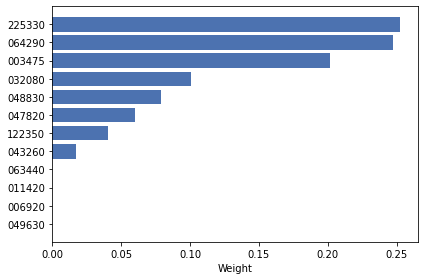

In [55]:
# 종목별 투자비중
plotting.plot_weights(weights2, ax=None)

### 투자금액과 포트폴리오의 비중에 맞추어 수량 할당

In [56]:
!pip install pulp

#### ver01> 결측값 삭제하지 않음 / df / mu, S / ef, cleaned_weights ( 20개 종목 )

In [57]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# 투자금액 (단위: KRW)
portfolio_val = 15000000

latest_prices = get_latest_prices(df)

weights = cleaned_weights

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portfolio_val)

allocation, leftover = da.lp_portfolio(verbose=False)

print('Discrete Allocaion: ', allocation)
print('Funds Remaining: ', leftover, ' KRW')

rmse = da._allocation_rmse_error(verbose=False)

Discrete Allocaion:  {'003475': 597, '122350': 111, '347000': 84, '225330': 431, '032080': 494, '048830': 310, '064290': 170, '047820': 345}
Funds Remaining:  215.0  KRW
Allocation has RMSE: 0.000


In [58]:
allocation

{'003475': 597,
 '032080': 494,
 '047820': 345,
 '048830': 310,
 '064290': 170,
 '122350': 111,
 '225330': 431,
 '347000': 84}

In [59]:
len(allocation)

8

#### ver02> 결측값 삭제하지 않음 / df2 / mu2, S2 / ef2, cleaned_weights2 /  ( 12개 종목 )

In [60]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# 투자금액 (단위: KRW)
portfolio_val = 15000000

latest_prices2 = get_latest_prices(df2)

weights2 = cleaned_weights2

da2 = DiscreteAllocation(weights2, latest_prices2, total_portfolio_value=portfolio_val)

allocation2, leftover2 = da2.lp_portfolio(verbose=False)

print('Discrete Allocaion: ', allocation2)
print('Funds Remaining: ', leftover2, ' KRW')

rmse2 = da2._allocation_rmse_error(verbose=False)

Discrete Allocaion:  {'003475': 681, '122350': 144, '043260': 154, '225330': 500, '032080': 516, '048830': 395, '064290': 172, '047820': 342}
Funds Remaining:  165.0  KRW
Allocation has RMSE: 0.000


In [61]:
allocation2

{'003475': 681,
 '032080': 516,
 '043260': 154,
 '047820': 342,
 '048830': 395,
 '064290': 172,
 '122350': 144,
 '225330': 500}

In [62]:
len(allocation2)

8

### 포트폴리오 결과로 보여줄 변수 저장

#### ver01> 결측값 삭제하지 않음 ( 20개 종목 )

In [63]:
# 각 종목별 실제 투자 금액
inv_total_price = {}

for i in allocation.keys():
  inv_total_price[i] = latest_prices.loc[i]*allocation[i]
inv_total_price

{'003475': 2647695.0,
 '032080': 1447420.0,
 '047820': 905625.0,
 '048830': 933100.0,
 '064290': 3680500.0,
 '122350': 467865.0,
 '225330': 3266980.0,
 '347000': 1650600.0}

In [64]:
# 총 투자금액
investment = 0

for i in inv_total_price.values():
    investment += i
print(investment)

14999785.0


In [65]:
portfolio_val-leftover

14999785.0

In [66]:
# 각 종목별 실제 투자 비중
inv_total_weight = {}

for i in allocation.keys():
  inv_total_weight[i] = inv_total_price[i]/investment
inv_total_weight

{'003475': 0.1765155300559308,
 '032080': 0.09649604977671347,
 '047820': 0.06037586538740389,
 '048830': 0.062207558308335756,
 '064290': 0.24537018363929883,
 '122350': 0.03119144707740811,
 '225330': 0.21780178849230172,
 '347000': 0.11004157726260744}

In [67]:
# 투자비중의 합계
investment_w = 0

for i in inv_total_weight.values():
    investment_w += i
print(investment_w)

1.0


In [68]:
# 결과값으로 불러올 값을 리스트로 저장
name_list = []                    # 종목명(회사이름)
total_price_stock =[]             # 각 종목별 실제 투자 금액
total_weight_stock = []           # 각 종목별 실제 투자 비중

for i in allocation.keys(): # i = 포트폴리오에 할당된 종목의 종목코드
    name_list.append(code_name_dict.get(i))
    total_price_stock.append(inv_total_price.get(i))
    total_weight_stock.append(inv_total_weight.get(i))

In [69]:
name_list

['유안타증권우', '삼기', '센코', '씨엠에스에듀', '아즈텍WB', '엔피케이', '인텍플러스', '초록뱀미디어']

In [70]:
total_price_stock

[2647695.0,
 467865.0,
 1650600.0,
 3266980.0,
 1447420.0,
 933100.0,
 3680500.0,
 905625.0]

In [71]:
total_weight_stock

[0.1765155300559308,
 0.03119144707740811,
 0.11004157726260744,
 0.21780178849230172,
 0.09649604977671347,
 0.062207558308335756,
 0.24537018363929883,
 0.06037586538740389]

In [72]:
# Get the discrete allocation values
discrete_allocation_list = []
for symbol in allocation:
  discrete_allocation_list.append(allocation.get(symbol))

In [73]:
discrete_allocation_list

[597, 111, 84, 431, 494, 310, 170, 345]

In [74]:
# Create a dataframe for the portfolio
portfolio_df = pd.DataFrame(columns = ['종목명','종목코드','수량(주)', '투자금액(원)','투자비중'])
portfolio_df

,종목명,종목코드,수량(주),투자금액(원),투자비중


In [75]:
# portfolio_df['Company_name'] = company_name
portfolio_df['종목명'] = name_list
portfolio_df['종목코드'] = allocation
portfolio_df['수량(주)'] = discrete_allocation_list
portfolio_df['투자금액(원)'] = total_price_stock
portfolio_df['투자비중'] = total_weight_stock

In [76]:
portfolio_df

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,유안타증권우,003475,597,2647695.0,0.176516
1,삼기,122350,111,467865.0,0.031191
2,센코,347000,84,1650600.0,0.110042
3,씨엠에스에듀,225330,431,3266980.0,0.217802
4,아즈텍WB,032080,494,1447420.0,0.096496
5,엔피케이,048830,310,933100.0,0.062208
6,인텍플러스,064290,170,3680500.0,0.245370
7,초록뱀미디어,047820,345,905625.0,0.060376


In [77]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted = portfolio_df.sort_values('투자비중', ascending = False)
portfolio_df_sorted = portfolio_df_sorted.reset_index(drop=True)
portfolio_df_sorted

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,인텍플러스,064290,170,3680500.0,0.245370
1,씨엠에스에듀,225330,431,3266980.0,0.217802
2,유안타증권우,003475,597,2647695.0,0.176516
3,센코,347000,84,1650600.0,0.110042
4,아즈텍WB,032080,494,1447420.0,0.096496
5,엔피케이,048830,310,933100.0,0.062208
6,초록뱀미디어,047820,345,905625.0,0.060376
7,삼기,122350,111,467865.0,0.031191


### 투자 금액에 따라 최적화된 포트폴리오의 종목별 수량

In [78]:
portfolio_df_sorted.loc["합계",2:] = portfolio_df_sorted.sum()
portfolio_df_sorted

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,인텍플러스,064290,170.0,3680500.0,0.245370
1,씨엠에스에듀,225330,431.0,3266980.0,0.217802
2,유안타증권우,003475,597.0,2647695.0,0.176516
3,센코,347000,84.0,1650600.0,0.110042
4,아즈텍WB,032080,494.0,1447420.0,0.096496
5,엔피케이,048830,310.0,933100.0,0.062208
6,초록뱀미디어,047820,345.0,905625.0,0.060376
7,삼기,122350,111.0,467865.0,0.031191
합계,NaN,NaN,2542.0,14999785.0,1.000000


#### ver02> 결측값 삭제 ( 12개 종목 )

In [79]:
# 각 종목별 실제 투자 금액
inv_total_price2 = {}

for i in allocation2.keys():
  inv_total_price2[i] = latest_prices2.loc[i]*allocation2[i]
inv_total_price2

{'003475': 3020235,
 '032080': 1511880,
 '043260': 260260,
 '047820': 897750,
 '048830': 1188950,
 '064290': 3723800,
 '122350': 606960,
 '225330': 3790000}

In [80]:
# 총 투자금액
investment2 = 0

for i in inv_total_price2.values():
    investment2 += i
print(investment2)

14999835


In [81]:
portfolio_val-leftover2

14999835.0

In [82]:
# 각 종목별 실제 투자 비중
inv_total_weight2 = {}

for i in allocation2.keys():
  inv_total_weight2[i] = inv_total_price2[i]/investment2
inv_total_weight2

{'003475': 0.2013512148633635,
 '032080': 0.10079310872419596,
 '043260': 0.017350857526099453,
 '047820': 0.05985065835724193,
 '048830': 0.07926420523959096,
 '064290': 0.24825606415003898,
 '122350': 0.0404644451088962,
 '225330': 0.252669446030573}

In [83]:
# 투자비중의 합계
investment_w2 = 0

for i in inv_total_weight2.values():
    investment_w2 += i
print(investment_w2)

1.0


In [84]:
# 결과값으로 불러올 값을 리스트로 저장
name_list2 = []                    # 종목명(회사이름)
total_price_stock2 =[]             # 각 종목별 실제 투자 금액
total_weight_stock2 = []           # 각 종목별 실제 투자 비중

for i in allocation2.keys(): # i = 포트폴리오에 할당된 종목의 종목코드
    name_list2.append(code_name_dict.get(i))
    total_price_stock2.append(inv_total_price2.get(i))
    total_weight_stock2.append(inv_total_weight2.get(i))

In [85]:
name_list2

['유안타증권우', '삼기', '성호전자', '씨엠에스에듀', '아즈텍WB', '엔피케이', '인텍플러스', '초록뱀미디어']

In [86]:
total_price_stock2

[3020235, 606960, 260260, 3790000, 1511880, 1188950, 3723800, 897750]

In [87]:
total_weight_stock2

[0.2013512148633635,
 0.0404644451088962,
 0.017350857526099453,
 0.252669446030573,
 0.10079310872419596,
 0.07926420523959096,
 0.24825606415003898,
 0.05985065835724193]

In [88]:
# Get the discrete allocation values
discrete_allocation_list2 = []
for symbol in allocation2:
  discrete_allocation_list2.append(allocation2.get(symbol))

In [89]:
discrete_allocation_list2

[681, 144, 154, 500, 516, 395, 172, 342]

In [90]:
# Create a dataframe for the portfolio
portfolio_df2 = pd.DataFrame(columns = ['종목명','종목코드','수량(주)', '투자금액(원)','투자비중'])
portfolio_df2

,종목명,종목코드,수량(주),투자금액(원),투자비중


In [91]:
# portfolio_df['Company_name'] = company_name
portfolio_df2['종목명'] = name_list2
portfolio_df2['종목코드'] = allocation2
portfolio_df2['수량(주)'] = discrete_allocation_list2
portfolio_df2['투자금액(원)'] = total_price_stock2
portfolio_df2['투자비중'] = total_weight_stock2

In [92]:
portfolio_df2

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,유안타증권우,003475,681,3020235,0.201351
1,삼기,122350,144,606960,0.040464
2,성호전자,043260,154,260260,0.017351
3,씨엠에스에듀,225330,500,3790000,0.252669
4,아즈텍WB,032080,516,1511880,0.100793
5,엔피케이,048830,395,1188950,0.079264
6,인텍플러스,064290,172,3723800,0.248256
7,초록뱀미디어,047820,342,897750,0.059851


In [93]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted2 = portfolio_df2.sort_values('투자비중', ascending = False)
portfolio_df_sorted2 = portfolio_df_sorted2.reset_index(drop=True)
portfolio_df_sorted2

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,씨엠에스에듀,225330,500,3790000,0.252669
1,인텍플러스,064290,172,3723800,0.248256
2,유안타증권우,003475,681,3020235,0.201351
3,아즈텍WB,032080,516,1511880,0.100793
4,엔피케이,048830,395,1188950,0.079264
5,초록뱀미디어,047820,342,897750,0.059851
6,삼기,122350,144,606960,0.040464
7,성호전자,043260,154,260260,0.017351


### 투자 금액에 따라 최적화된 포트폴리오의 종목별 수량

In [94]:
portfolio_df_sorted2.loc["합계",2:] = portfolio_df_sorted2.sum()
portfolio_df_sorted2

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,씨엠에스에듀,225330,500.0,3790000.0,0.252669
1,인텍플러스,064290,172.0,3723800.0,0.248256
2,유안타증권우,003475,681.0,3020235.0,0.201351
3,아즈텍WB,032080,516.0,1511880.0,0.100793
4,엔피케이,048830,395.0,1188950.0,0.079264
5,초록뱀미디어,047820,342.0,897750.0,0.059851
6,삼기,122350,144.0,606960.0,0.040464
7,성호전자,043260,154.0,260260.0,0.017351
합계,NaN,NaN,2904.0,14999835.0,1.000000


# 포트폴리오의 수익률과 변동성을 벤치마크지수(KOSPI)와 비교

#### ver01> 결측값 삭제 ( 20개 종목 )

In [95]:
df

,011420,003475,063440,348030,006920,122350,357550,043260,347000,356890,225330,032080,048830,153710,313760,303530,064290,049630,047820,163730
Date,,,,,,,,,,,,,,,,,,,,
2018-07-19,1885,2305,2110,NaN,5530,3075,NaN,1140,NaN,NaN,7970,1970,2060,NaN,NaN,NaN,3570,1472,1393,NaN
2018-07-20,1880,2285,2000,NaN,5540,3060,NaN,1085,NaN,NaN,7960,1900,2050,NaN,NaN,NaN,3540,1434,1398,NaN
2018-07-23,1855,2305,1900,NaN,5180,3005,NaN,1040,NaN,NaN,7800,1840,1960,NaN,NaN,NaN,3335,1351,1302,NaN
2018-07-24,1850,2325,1960,NaN,5450,2985,NaN,1085,NaN,NaN,7940,1865,2015,NaN,NaN,NaN,3435,1458,1316,NaN
2018-07-25,1820,2320,1925,NaN,5530,3050,NaN,1070,NaN,NaN,7920,1830,1980,NaN,NaN,NaN,3425,1393,1288,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,1950,4650,2775,20900.0,6000,4175,20550.0,1675,19450.0,14750.0,7450,3025,2340,15000.0,13650.0,15500.0,22200,1030,2460,19900.0
2021-07-14,1900,4580,2775,20600.0,5970,4220,21550.0,1720,19300.0,14600.0,7490,3025,2375,14850.0,13500.0,15950.0,21900,1050,2500,19800.0
2021-07-15,1895,4580,2765,20750.0,5970,4205,21450.0,1720,19650.0,14800.0,7790,3000,3085,14800.0,13500.0,15750.0,22600,1100,2470,19750.0


In [96]:
cleaned_weights

OrderedDict([('011420', 0.0),
             ('003475', 0.17651),
             ('063440', 0.0),
             ('348030', 0.0),
             ('006920', 0.0),
             ('122350', 0.03108),
             ('357550', 0.0),
             ('043260', 0.0),
             ('347000', 0.10977),
             ('356890', 0.0),
             ('225330', 0.21758),
             ('032080', 0.09659),
             ('048830', 0.06213),
             ('153710', 0.0),
             ('313760', 0.0),
             ('303530', 0.0),
             ('064290', 0.24603),
             ('049630', 0.0),
             ('047820', 0.0603),
             ('163730', 0.0)])

In [97]:
len(cleaned_weights)

20

In [98]:
# 각 일자별, 종목별 종가에 해당 weights를 곱해주기
for i, weight in cleaned_weights.items():
    df[i] = df[i]*weight

In [99]:
df

,011420,003475,063440,348030,006920,122350,357550,043260,347000,356890,225330,032080,048830,153710,313760,303530,064290,049630,047820,163730
Date,,,,,,,,,,,,,,,,,,,,
2018-07-19,0.0,406.85555,0.0,NaN,0.0,95.5710,NaN,0.0,NaN,NaN,1734.1126,190.28230,127.98780,NaN,NaN,NaN,878.32710,0.0,83.9979,NaN
2018-07-20,0.0,403.32535,0.0,NaN,0.0,95.1048,NaN,0.0,NaN,NaN,1731.9368,183.52100,127.36650,NaN,NaN,NaN,870.94620,0.0,84.2994,NaN
2018-07-23,0.0,406.85555,0.0,NaN,0.0,93.3954,NaN,0.0,NaN,NaN,1697.1240,177.72560,121.77480,NaN,NaN,NaN,820.51005,0.0,78.5106,NaN
2018-07-24,0.0,410.38575,0.0,NaN,0.0,92.7738,NaN,0.0,NaN,NaN,1727.5852,180.14035,125.19195,NaN,NaN,NaN,845.11305,0.0,79.3548,NaN
2018-07-25,0.0,409.50320,0.0,NaN,0.0,94.7940,NaN,0.0,NaN,NaN,1723.2336,176.75970,123.01740,NaN,NaN,NaN,842.65275,0.0,77.6664,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,0.0,820.77150,0.0,0.0,0.0,129.7590,0.0,0.0,2135.0265,0.0,1620.9710,292.18475,145.38420,0.0,0.0,0.0,5461.86600,0.0,148.3380,0.0
2021-07-14,0.0,808.41580,0.0,0.0,0.0,131.1576,0.0,0.0,2118.5610,0.0,1629.6742,292.18475,147.55875,0.0,0.0,0.0,5388.05700,0.0,150.7500,0.0
2021-07-15,0.0,808.41580,0.0,0.0,0.0,130.6914,0.0,0.0,2156.9805,0.0,1694.9482,289.77000,191.67105,0.0,0.0,0.0,5560.27800,0.0,148.9410,0.0


In [100]:
# 일자별 종목의 (종가*비중) 합계를 Port열에 저장
df['Port'] = df.sum(axis = 1)
df

,011420,003475,063440,348030,006920,122350,357550,043260,347000,356890,225330,032080,048830,153710,313760,303530,064290,049630,047820,163730,Port
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-19,0.0,406.85555,0.0,NaN,0.0,95.5710,NaN,0.0,NaN,NaN,1734.1126,190.28230,127.98780,NaN,NaN,NaN,878.32710,0.0,83.9979,NaN,3517.13425
2018-07-20,0.0,403.32535,0.0,NaN,0.0,95.1048,NaN,0.0,NaN,NaN,1731.9368,183.52100,127.36650,NaN,NaN,NaN,870.94620,0.0,84.2994,NaN,3496.50005
2018-07-23,0.0,406.85555,0.0,NaN,0.0,93.3954,NaN,0.0,NaN,NaN,1697.1240,177.72560,121.77480,NaN,NaN,NaN,820.51005,0.0,78.5106,NaN,3395.89600
2018-07-24,0.0,410.38575,0.0,NaN,0.0,92.7738,NaN,0.0,NaN,NaN,1727.5852,180.14035,125.19195,NaN,NaN,NaN,845.11305,0.0,79.3548,NaN,3460.54490
2018-07-25,0.0,409.50320,0.0,NaN,0.0,94.7940,NaN,0.0,NaN,NaN,1723.2336,176.75970,123.01740,NaN,NaN,NaN,842.65275,0.0,77.6664,NaN,3447.62705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,0.0,820.77150,0.0,0.0,0.0,129.7590,0.0,0.0,2135.0265,0.0,1620.9710,292.18475,145.38420,0.0,0.0,0.0,5461.86600,0.0,148.3380,0.0,10754.30095
2021-07-14,0.0,808.41580,0.0,0.0,0.0,131.1576,0.0,0.0,2118.5610,0.0,1629.6742,292.18475,147.55875,0.0,0.0,0.0,5388.05700,0.0,150.7500,0.0,10666.35910
2021-07-15,0.0,808.41580,0.0,0.0,0.0,130.6914,0.0,0.0,2156.9805,0.0,1694.9482,289.77000,191.67105,0.0,0.0,0.0,5560.27800,0.0,148.9410,0.0,10981.69595


In [101]:
# 일자별 종가의 전일대비 변동률(수익률)을 portfolio라는 데이터프레임으로 저장
portfolio = df[['Port']].pct_change()
portfolio

,Port
Date,
2018-07-19,NaN
2018-07-20,-0.005867
2018-07-23,-0.028773
2018-07-24,0.019037
2018-07-25,-0.003733
...,...
2021-07-13,0.011980
2021-07-14,-0.008177
2021-07-15,0.029564


In [102]:
# 코스피지수 불러오기
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

,Close
Date,
2018-07-19,2282.29
2018-07-20,2289.19
2018-07-23,2269.31
2018-07-24,2280.20
2018-07-25,2273.03
...,...
2021-07-13,3271.38
2021-07-14,3264.81
2021-07-15,3286.22


In [103]:
# 코스피지수의 변동률(수익률) 구하기
# 변동률(수익률) = (당일가격-전일가격) / 전일가격
# 7/20의 변동률(수익률) = (7/20 가격-7-19 가격) / 7/19 가격
kospi_pct = kospi.pct_change()
kospi_pct

,Close
Date,
2018-07-19,NaN
2018-07-20,0.003023
2018-07-23,-0.008684
2018-07-24,0.004799
2018-07-25,-0.003144
...,...
2021-07-13,0.007673
2021-07-14,-0.002008
2021-07-15,0.006558


In [104]:
# 코스피와 포트폴리오 합치기
result = kospi_pct.join(portfolio)
result

,Close,Port
Date,,
2018-07-19,NaN,NaN
2018-07-20,0.003023,-0.005867
2018-07-23,-0.008684,-0.028773
2018-07-24,0.004799,0.019037
2018-07-25,-0.003144,-0.003733
...,...,...
2021-07-13,0.007673,0.011980
2021-07-14,-0.002008,-0.008177
2021-07-15,0.006558,0.029564


In [105]:
# 1열을 0으로 
result.iloc[0] = 0
result

,Close,Port
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.005867
2018-07-23,-0.008684,-0.028773
2018-07-24,0.004799,0.019037
2018-07-25,-0.003144,-0.003733
...,...,...
2021-07-13,0.007673,0.011980
2021-07-14,-0.002008,-0.008177
2021-07-15,0.006558,0.029564


In [106]:
# 열 이름 변경
result.columns = ['KOSPI', 'PORTFOLIO']
result

,KOSPI,PORTFOLIO
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.005867
2018-07-23,-0.008684,-0.028773
2018-07-24,0.004799,0.019037
2018-07-25,-0.003144,-0.003733
...,...,...
2021-07-13,0.007673,0.011980
2021-07-14,-0.002008,-0.008177
2021-07-15,0.006558,0.029564


In [107]:
# 1에서 시작해서, 전일대비 변동률(수익률)을 적용하여 수치화하기
wealth = (1+result).cumprod()
wealth

,KOSPI,PORTFOLIO
Date,,
2018-07-19,1.000000,1.000000
2018-07-20,1.003023,0.994133
2018-07-23,0.994313,0.965529
2018-07-24,0.999084,0.983910
2018-07-25,0.995943,0.980238
...,...,...
2021-07-13,1.433376,3.057689
2021-07-14,1.430497,3.032685
2021-07-15,1.439878,3.122342


## 시각화

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


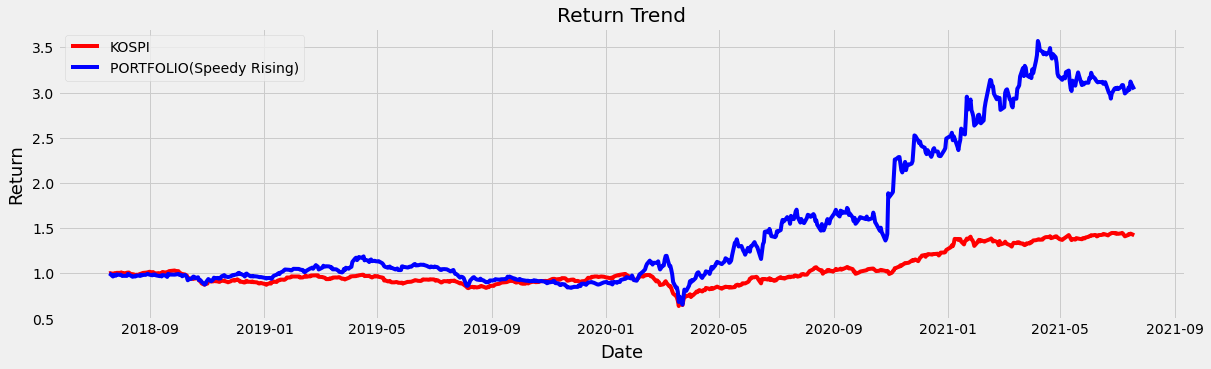

In [108]:
# 포트폴리오와 KOSPI 지수의 '누적 수익률 추이'를 시각화하여 비교

# matplotlib.pyplot 스타일시트 설정
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth.index, wealth.KOSPI , 'r', label='KOSPI')
plt.plot(wealth.index, wealth.PORTFOLIO ,'b', label="PORTFOLIO(Speedy Rising)")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.show()

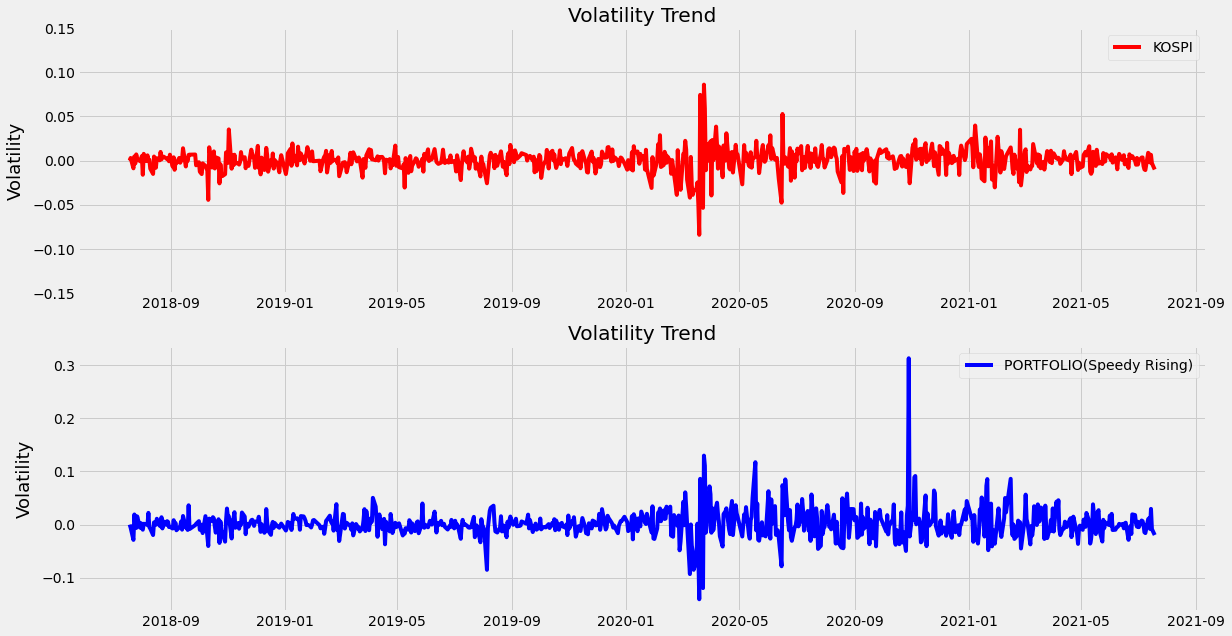

In [109]:
# 변동률 비교
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.title('Volatility Trend')

plt.plot(result.index, result.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.title('Volatility Trend')
plt.plot(result.index, result.PORTFOLIO ,'b', label="PORTFOLIO(Speedy Rising)")
# plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.grid(True)
plt.show()

In [110]:
print('----- Speedy rising portfolio performance -----')
# Show Risk Limit
print('Risk limit: ', vol_limit)

# Show Funds
print('Funds:', portfolio_val, 'KRW')

# Show Funds Remaining
print('Funds Remaining: ', leftover, ' KRW')

# Show Portfolio performance
ef.portfolio_performance(verbose=True)
rmse = da._allocation_rmse_error(verbose=False)

----- Speedy rising portfolio performance -----
Risk limit:  0.3
Funds: 15000000 KRW
Funds Remaining:  215.0  KRW
Expected annual return: 33.7%
Annual volatility: 30.0%
Sharpe Ratio: 1.06
Allocation has RMSE: 0.000


#### ver02> 결측값 삭제 ( 12개 종목 )

In [111]:
df2

,011420,003475,063440,006920,122350,043260,225330,032080,048830,064290,049630,047820
Date,,,,,,,,,,,,
2018-07-19,1885,2305,2110,5530,3075,1140,7970,1970,2060,3570,1472,1393
2018-07-20,1880,2285,2000,5540,3060,1085,7960,1900,2050,3540,1434,1398
2018-07-23,1855,2305,1900,5180,3005,1040,7800,1840,1960,3335,1351,1302
2018-07-24,1850,2325,1960,5450,2985,1085,7940,1865,2015,3435,1458,1316
2018-07-25,1820,2320,1925,5530,3050,1070,7920,1830,1980,3425,1393,1288
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,1950,4650,2775,6000,4175,1675,7450,3025,2340,22200,1030,2460
2021-07-14,1900,4580,2775,5970,4220,1720,7490,3025,2375,21900,1050,2500
2021-07-15,1895,4580,2765,5970,4205,1720,7790,3000,3085,22600,1100,2470


In [112]:
cleaned_weights2

OrderedDict([('011420', 0.0),
             ('003475', 0.20148),
             ('063440', 0.0),
             ('006920', 0.0),
             ('122350', 0.04063),
             ('043260', 0.01746),
             ('225330', 0.25259),
             ('032080', 0.10092),
             ('048830', 0.07924),
             ('064290', 0.24771),
             ('049630', 0.0),
             ('047820', 0.05997)])

In [113]:
len(cleaned_weights2)

12

In [114]:
# 각 일자별, 종목별 종가에 해당 weights를 곱해주기
for i, weight in cleaned_weights2.items():
    df2[i] = df2[i]*weight

In [115]:
df2

,011420,003475,063440,006920,122350,043260,225330,032080,048830,064290,049630,047820
Date,,,,,,,,,,,,
2018-07-19,0.0,464.4114,0.0,0.0,124.93725,19.9044,2013.1423,198.8124,163.2344,884.32470,0.0,83.53821
2018-07-20,0.0,460.3818,0.0,0.0,124.32780,18.9441,2010.6164,191.7480,162.4420,876.89340,0.0,83.83806
2018-07-23,0.0,464.4114,0.0,0.0,122.09315,18.1584,1970.2020,185.6928,155.3104,826.11285,0.0,78.08094
2018-07-24,0.0,468.4410,0.0,0.0,121.28055,18.9441,2005.5646,188.2158,159.6686,850.88385,0.0,78.92052
2018-07-25,0.0,467.4336,0.0,0.0,123.92150,18.6822,2000.5128,184.6836,156.8952,848.40675,0.0,77.24136
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,0.0,936.8820,0.0,0.0,169.63025,29.2455,1881.7955,305.2830,185.4216,5499.16200,0.0,147.52620
2021-07-14,0.0,922.7784,0.0,0.0,171.45860,30.0312,1891.8991,305.2830,188.1950,5424.84900,0.0,149.92500
2021-07-15,0.0,922.7784,0.0,0.0,170.84915,30.0312,1967.6761,302.7600,244.4554,5598.24600,0.0,148.12590


In [116]:
# 일자별 종목의 (종가*비중) 합계를 Port열에 저장
df2['Port'] = df2.sum(axis = 1)
df2

,011420,003475,063440,006920,122350,043260,225330,032080,048830,064290,049630,047820,Port
Date,,,,,,,,,,,,,
2018-07-19,0.0,464.4114,0.0,0.0,124.93725,19.9044,2013.1423,198.8124,163.2344,884.32470,0.0,83.53821,3952.30506
2018-07-20,0.0,460.3818,0.0,0.0,124.32780,18.9441,2010.6164,191.7480,162.4420,876.89340,0.0,83.83806,3929.19156
2018-07-23,0.0,464.4114,0.0,0.0,122.09315,18.1584,1970.2020,185.6928,155.3104,826.11285,0.0,78.08094,3820.06194
2018-07-24,0.0,468.4410,0.0,0.0,121.28055,18.9441,2005.5646,188.2158,159.6686,850.88385,0.0,78.92052,3891.91902
2018-07-25,0.0,467.4336,0.0,0.0,123.92150,18.6822,2000.5128,184.6836,156.8952,848.40675,0.0,77.24136,3877.77701
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,0.0,936.8820,0.0,0.0,169.63025,29.2455,1881.7955,305.2830,185.4216,5499.16200,0.0,147.52620,9154.94605
2021-07-14,0.0,922.7784,0.0,0.0,171.45860,30.0312,1891.8991,305.2830,188.1950,5424.84900,0.0,149.92500,9084.41930
2021-07-15,0.0,922.7784,0.0,0.0,170.84915,30.0312,1967.6761,302.7600,244.4554,5598.24600,0.0,148.12590,9384.92215


In [117]:
# 일자별 종가의 전일대비 변동률(수익률)을 portfolio라는 데이터프레임으로 저장
portfolio2 = df2[['Port']].pct_change()
portfolio2

,Port
Date,
2018-07-19,NaN
2018-07-20,-0.005848
2018-07-23,-0.027774
2018-07-24,0.018810
2018-07-25,-0.003634
...,...
2021-07-13,0.011263
2021-07-14,-0.007704
2021-07-15,0.033079


In [118]:
# 코스피지수 불러오기
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

,Close
Date,
2018-07-19,2282.29
2018-07-20,2289.19
2018-07-23,2269.31
2018-07-24,2280.20
2018-07-25,2273.03
...,...
2021-07-13,3271.38
2021-07-14,3264.81
2021-07-15,3286.22


In [119]:
# 코스피지수의 변동률(수익률) 구하기
# 변동률(수익률) = (당일가격-전일가격) / 전일가격
# 7/20의 변동률(수익률) = (7/20 가격-7-19 가격) / 7/19 가격
kospi_pct = kospi.pct_change()
kospi_pct

,Close
Date,
2018-07-19,NaN
2018-07-20,0.003023
2018-07-23,-0.008684
2018-07-24,0.004799
2018-07-25,-0.003144
...,...
2021-07-13,0.007673
2021-07-14,-0.002008
2021-07-15,0.006558


In [120]:
# 코스피와 포트폴리오 합치기
result2 = kospi_pct.join(portfolio2)
result2

,Close,Port
Date,,
2018-07-19,NaN,NaN
2018-07-20,0.003023,-0.005848
2018-07-23,-0.008684,-0.027774
2018-07-24,0.004799,0.018810
2018-07-25,-0.003144,-0.003634
...,...,...
2021-07-13,0.007673,0.011263
2021-07-14,-0.002008,-0.007704
2021-07-15,0.006558,0.033079


In [121]:
# 1열을 0으로 
result2.iloc[0] = 0
result2

,Close,Port
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.005848
2018-07-23,-0.008684,-0.027774
2018-07-24,0.004799,0.018810
2018-07-25,-0.003144,-0.003634
...,...,...
2021-07-13,0.007673,0.011263
2021-07-14,-0.002008,-0.007704
2021-07-15,0.006558,0.033079


In [122]:
# 열 이름 변경
result2.columns = ['KOSPI', 'PORTFOLIO']
result2

,KOSPI,PORTFOLIO
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.005848
2018-07-23,-0.008684,-0.027774
2018-07-24,0.004799,0.018810
2018-07-25,-0.003144,-0.003634
...,...,...
2021-07-13,0.007673,0.011263
2021-07-14,-0.002008,-0.007704
2021-07-15,0.006558,0.033079


In [123]:
# 1에서 시작해서, 전일대비 변동률(수익률)을 적용하여 수치화하기
wealth2 = (1+result2).cumprod()
wealth2

,KOSPI,PORTFOLIO
Date,,
2018-07-19,1.000000,1.000000
2018-07-20,1.003023,0.994152
2018-07-23,0.994313,0.966540
2018-07-24,0.999084,0.984721
2018-07-25,0.995943,0.981143
...,...,...
2021-07-13,1.433376,2.316356
2021-07-14,1.430497,2.298512
2021-07-15,1.439878,2.374544


## 시각화

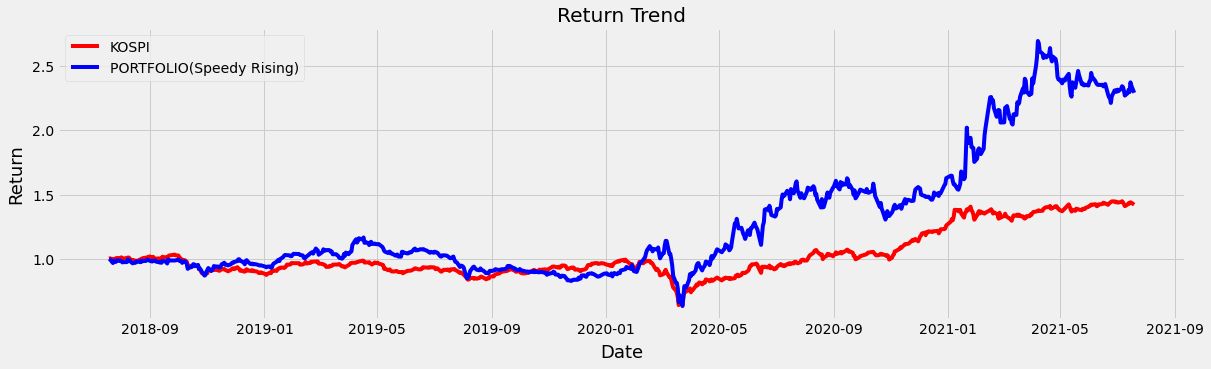

In [124]:
# 포트폴리오와 KOSPI 지수의 '누적 수익률 추이'를 시각화하여 비교

# matplotlib.pyplot 스타일시트 설정
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth2.index, wealth2.KOSPI , 'r', label='KOSPI')
plt.plot(wealth2.index, wealth2.PORTFOLIO ,'b', label="PORTFOLIO(Speedy Rising)")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.show()

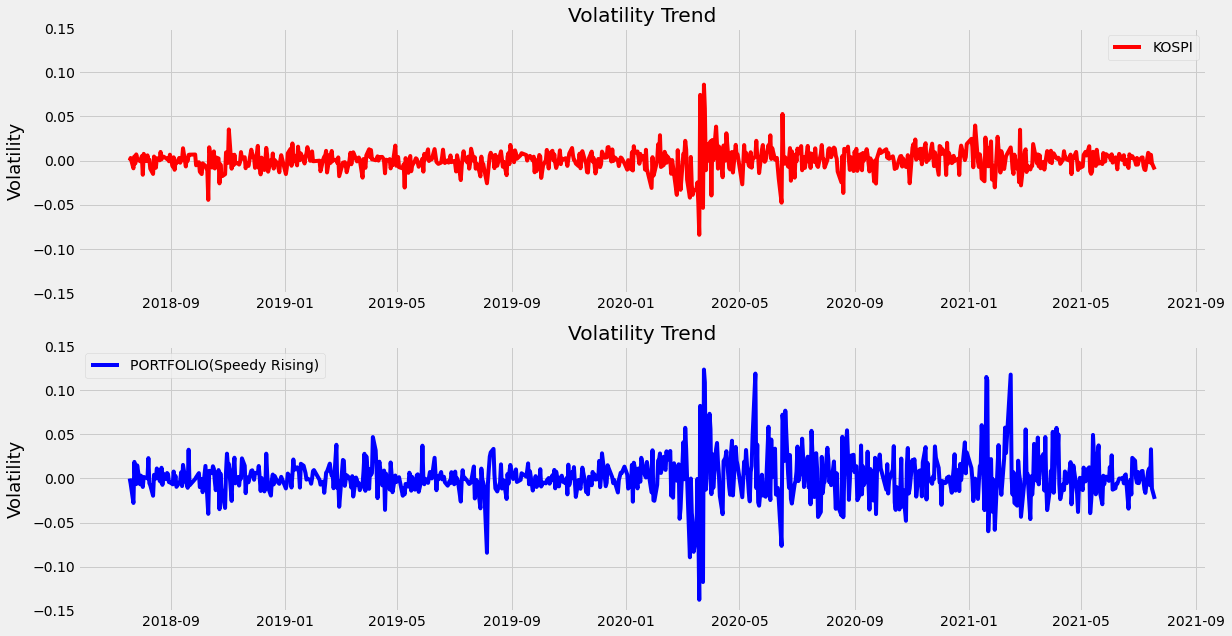

In [125]:
# 변동률 비교
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.title('Volatility Trend')

plt.plot(result2.index, result2.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.title('Volatility Trend')
plt.plot(result2.index, result2.PORTFOLIO ,'b', label="PORTFOLIO(Speedy Rising)")
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.grid(True)
plt.show()

In [126]:
portfolio_df_sorted2

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,씨엠에스에듀,225330,500.0,3790000.0,0.252669
1,인텍플러스,064290,172.0,3723800.0,0.248256
2,유안타증권우,003475,681.0,3020235.0,0.201351
3,아즈텍WB,032080,516.0,1511880.0,0.100793
4,엔피케이,048830,395.0,1188950.0,0.079264
5,초록뱀미디어,047820,342.0,897750.0,0.059851
6,삼기,122350,144.0,606960.0,0.040464
7,성호전자,043260,154.0,260260.0,0.017351
합계,NaN,NaN,2904.0,14999835.0,1.000000


In [129]:
print('----- Speedy rising portfolio performance -----')
# Show Risk Limit
print('Risk limit: ', vol_limit2)

# Show Funds
print('Funds:', portfolio_val, 'KRW')

# Show Funds Remaining
print('Funds Remaining: ', leftover2, ' KRW')

# Show Portfolio performance
ef2.portfolio_performance(verbose=True)
rmse2 = da2._allocation_rmse_error(verbose=False)

----- Speedy rising portfolio performance -----
Risk limit:  0.3
Funds: 15000000 KRW
Funds Remaining:  165.0  KRW
Expected annual return: 30.3%
Annual volatility: 30.0%
Sharpe Ratio: 0.95
Allocation has RMSE: 0.000
